importing nesscessary libraries.

In [5]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

-----------------------------------
Reading the data from csv file format

In [6]:
dataframe = pd.read_csv('daily_weather.csv')

In [7]:
dataframe.head()

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000
1,1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597
2,2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000
3,3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547
4,4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000


-----------------------------------------------
Checking wheather any null values present or not 

In [12]:
dataframe[dataframe.isnull().any(axis=1)].head()

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
16,16,917.890000,NaN,169.200000,2.192201,196.800000,2.930391,0.0,0.0,48.990000,51.190000
111,111,915.290000,58.820000,182.600000,15.613841,189.000000,NaN,0.0,0.0,21.500000,29.690000
177,177,915.900000,NaN,183.300000,4.719943,189.900000,5.346287,0.0,0.0,29.260000,46.500000
262,262,923.596607,58.380598,47.737753,10.636273,67.145843,13.671423,0.0,NaN,17.990876,16.461685
277,277,920.480000,62.600000,194.400000,2.751436,NaN,3.869906,0.0,0.0,52.580000,54.030000


------------------------------------------
deleting number coloumn as it wont contribute in decision making.

In [13]:
del dataframe['number']

In [19]:
dataframe.columns

Index(['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am',
       'relative_humidity_3pm'],
      dtype='object')

----------------------------
calculating the number of rows before deleteing null value rows

In [22]:
before_raws = dataframe.shape[0]
print("No.of raws before deltetion : {} ".format(before_raws))

No.of raws before deltetion : 1095 


---------------------------------
Deleteing rows which have null values

In [23]:
dataframe = dataframe.dropna()

In [24]:
after_raws = dataframe.shape[0]
print("No.of raws after deltetion : {} ".format(after_raws))

No.of raws after deltetion : 1064 


-----------------------------------------------------
Lets filter the values which are more than 24.99 relative humity at 3.00pm

In [25]:
clean_dataframe = dataframe.copy()

In [28]:
clean_dataframe['high_humidity_label'] = (clean_dataframe['relative_humidity_3pm'] > 24.99)*1

In [29]:
clean_dataframe['high_humidity_label'].head()

0    1
1    0
2    0
3    0
4    1
Name: high_humidity_label, dtype: int64

In [32]:
y = clean_dataframe[['high_humidity_label']].copy()
y.head()

,high_humidity_label
0,1
1,0
2,0
3,0
4,1


-----------------------------------------
Storing morning features other than relative_humidity_3pm

In [34]:
morning_features = ['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am']

x = clean_dataframe[morning_features].copy()
x.head()

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am
0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000
1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697
2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000
3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102
4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000


--------------
By using train_test_split split the dataframe into train set and test set.

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.2, random_state=324)

In [42]:
print("Shape of X_train : {} ".format(X_train.shape))
print("Shape of Y_train : {} ".format(Y_train.shape))
print("Shape of X_test : {} ".format(X_test.shape))
print("Shape of Y_test : {} ".format(Y_test.shape))

Shape of X_train : (851, 9) 
Shape of Y_train : (851, 1) 
Shape of X_test : (213, 9) 
Shape of Y_test : (213, 1) 


-------------------
Let assign a classifier for decision tree and train the data using that classifier.

In [107]:
humidity_classifier = DecisionTreeClassifier(max_leaf_nodes = 10, random_state=0)
humidity_classifier.fit(X_train, Y_train)

DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)

-----------------
Using humidity_classifier, lets predict for X_test

In [108]:
Y_predicted = humidity_classifier.predict(X_test)
Y_predicted[:10]

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 1])

----------------------------
Lets find the accuracy score of Y_predicted

In [111]:
print("Predicted Accuracy : {}".format(accuracy_score(Y_test, Y_predicted)*100))

Predicted Accuracy : 87.79342723004694


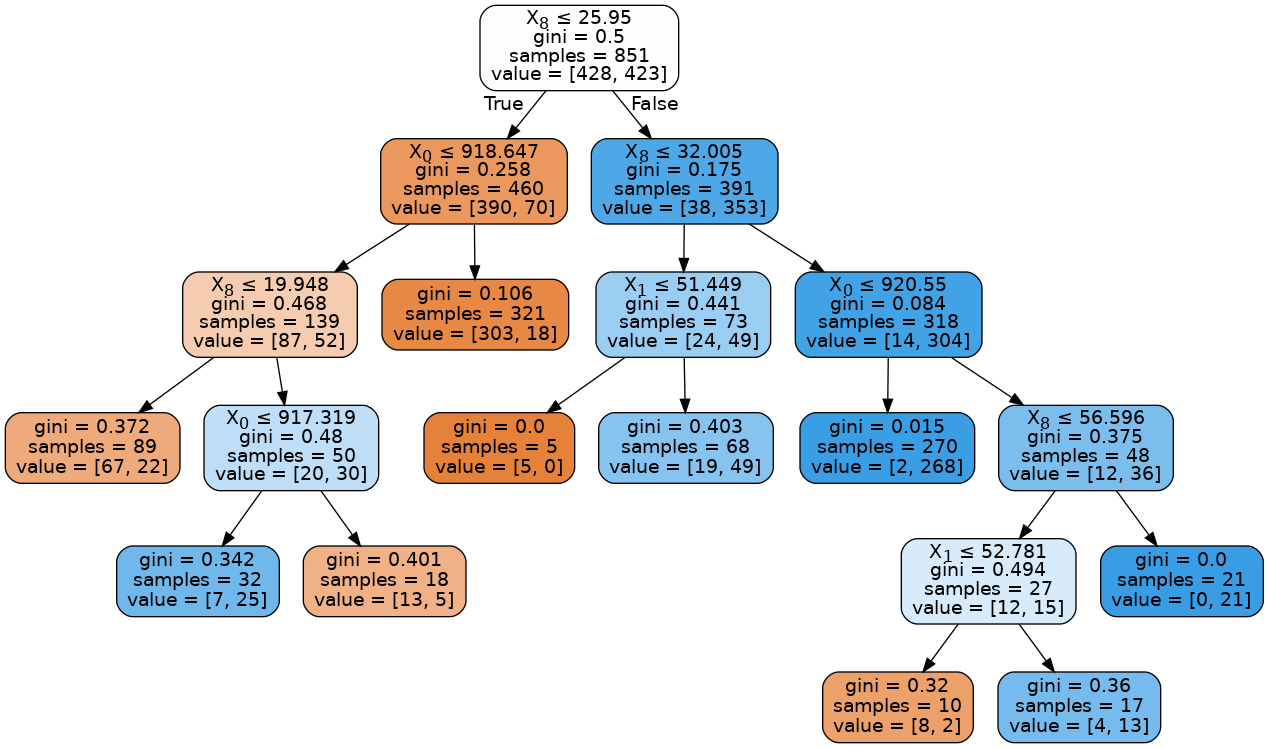

In [110]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(humidity_classifier, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())